# Term Deposit Prediction using Ensemble Techniques

## Data Description:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.  

## Domain:
Banking 

## Context: 
Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product. 

## Attribute Information:
1. age (numeric) 
2. job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown') 
3. marital : marital status (categorical: 'divorced','married','single'; note: 'divorced' means divorced or widowed) 
4. education (categorical: 'primary','secondary','tertiary','unknown') 
5. default: has credit in default? (categorical: 'no','yes','unknown') 
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown') 
8. loan: has personal loan? (categorical: 'no','yes','unknown') 
9. contact: contact communication type (categorical: 'cellular','telephone', 'unknown') 
10. day: last contact day of the month (numeric 1 -31)  
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') 
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. 
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 
15. previous: number of contacts performed before this campaign and for this client (numeric) 
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') 
17. target: has the client subscribed a term deposit? (binary: "yes","no") 
 
## Learning Outcomes:   
* Exploratory Data Analysis  
* Preparing the data to train a model  
* Training and making predictions using an Ensemble Model  
* Tuning an Ensemble model 
 
## Objective:  
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y). 

## Steps and tasks: 
1. Import the necessary libraries (2.5 marks) 
2. Read the data as a data frame (2.5 marks) 
3. Perform basic EDA which should include the following and print out your insights at every step. (15 marks) 
   * Shape of the data (2 marks) 
   * Data type of each attribute (2 marks) 
   * Checking the presence of missing values (4 marks) 
   * 5 Point summary of numerical attributes (3 marks)  
   * Checking the presence of outliers (4 marks) 
4. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks) 
5. Train a few standard classification algorithms, note and comment on their performances across different classification metrics. (15 marks) 
6. Build the ensemble models and compare the results with the base models. Note: Random forest can be used only with Decision trees. (15 marks) 
7. Compare performances of all the models (5 marks) 

## 1. Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')

# Librarires for visualizing the tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

## 2. Read the data as a dataframe

In [3]:
bankdata = pd.read_csv("bank-full.csv",sep=',')

### Read the first 10 records from the dataframe

In [4]:
bankdata.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## 3. Basic Exploratory Data Analysis

### 3a. Shape of the data

In [5]:
bankdata.shape

(45211, 17)

In [6]:
bankdata.isnull().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [7]:
bankdata.isna().count()

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

**Observation:** There are 45211 rows and 17 columns in the dataframe. None of the columns have a null or NaN value.

### 3b. Datatype of each attribute

In [8]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [9]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### 3c. Checking the presence of any missing values

In [10]:
# Check for any missing data in categorical variables 

categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                         'poutcome','Target']
for col in categorcial_variables:
    print(bankdata[col].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

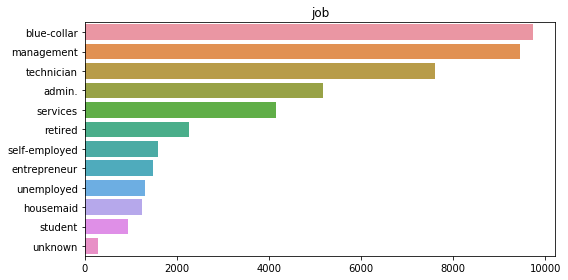

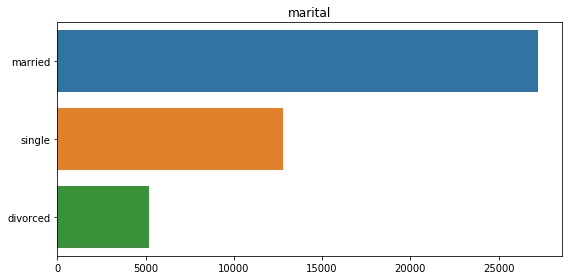

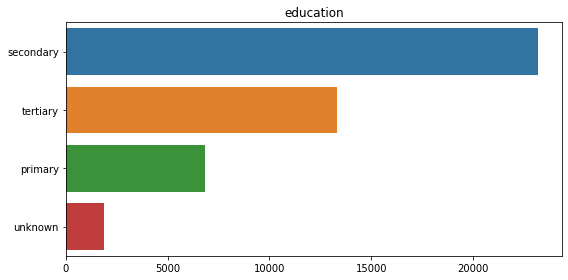

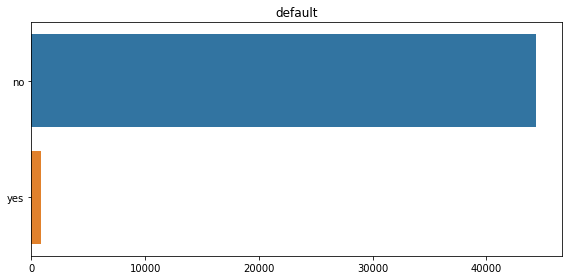

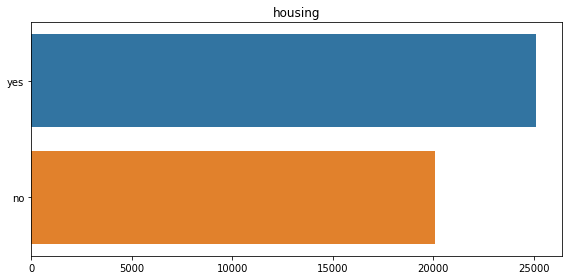

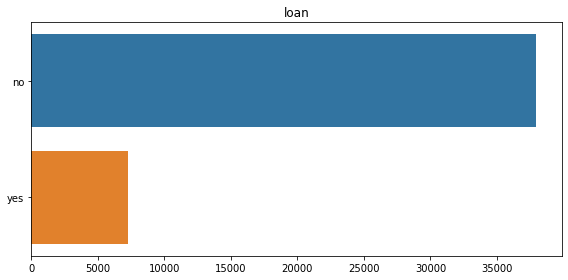

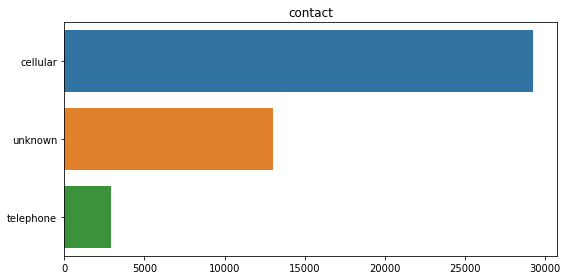

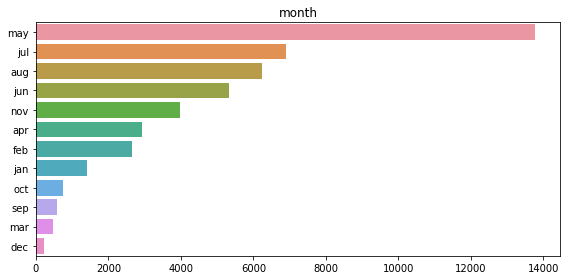

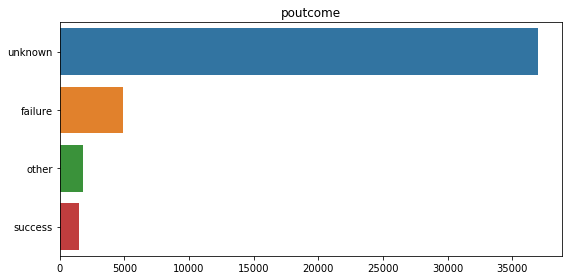

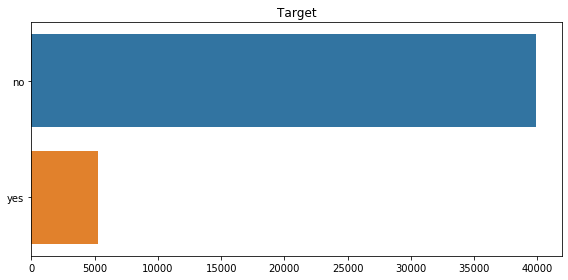

In [11]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                         'poutcome','Target']
for col in categorcial_variables:
    plt.figure(figsize=(8,4))
    sns.barplot(bankdata[col].value_counts().values, bankdata[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

**Observation:** Based on the above data and graphs, it is seen that the attributes - job, education, contact and poutcome have unknown data in them. We would need to encode this data.

In [12]:
# Check for any missing/negative data in numeric variables 

numeric_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_variables:
    print(bankdata[col].value_counts())

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64
124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327

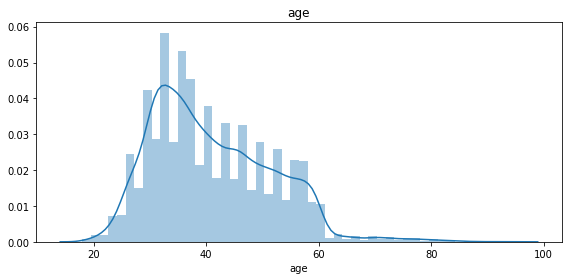

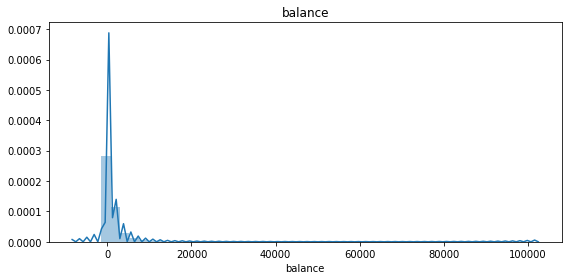

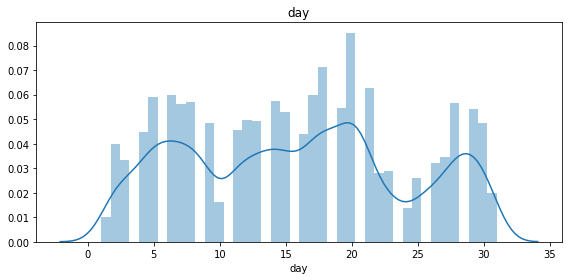

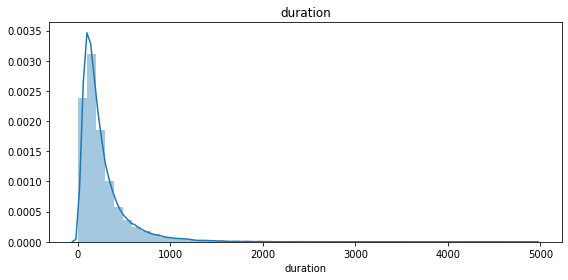

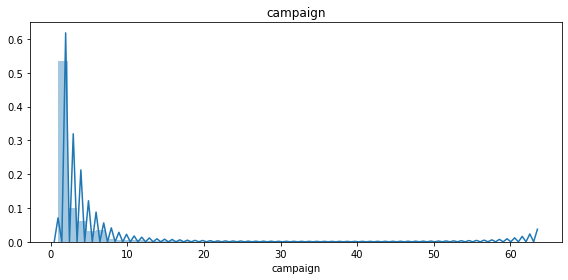

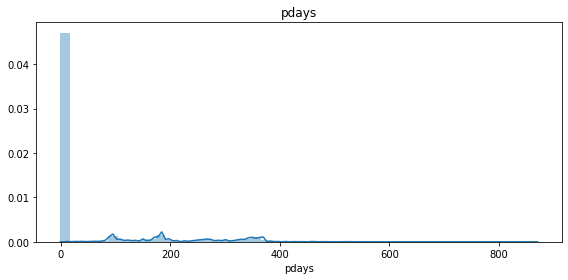

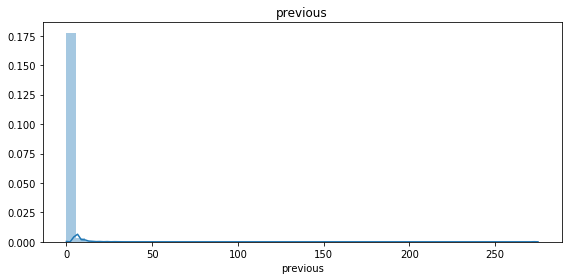

In [13]:
numeric_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_variables:
    plt.figure(figsize=(8,4))
    sns.distplot(bankdata[col])
    plt.title(col)
    plt.tight_layout()

**Observation:** The attribute pdays has negative values. This would need to be replaced since there are 36954 rows with a value of -1.

### 3d. Five Point Summary of Numerical Variables

In [14]:
bankdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


**Observation:** There are negative values in the attributes balance and pdays. We need to see if they could be ignored or need to be imputed.

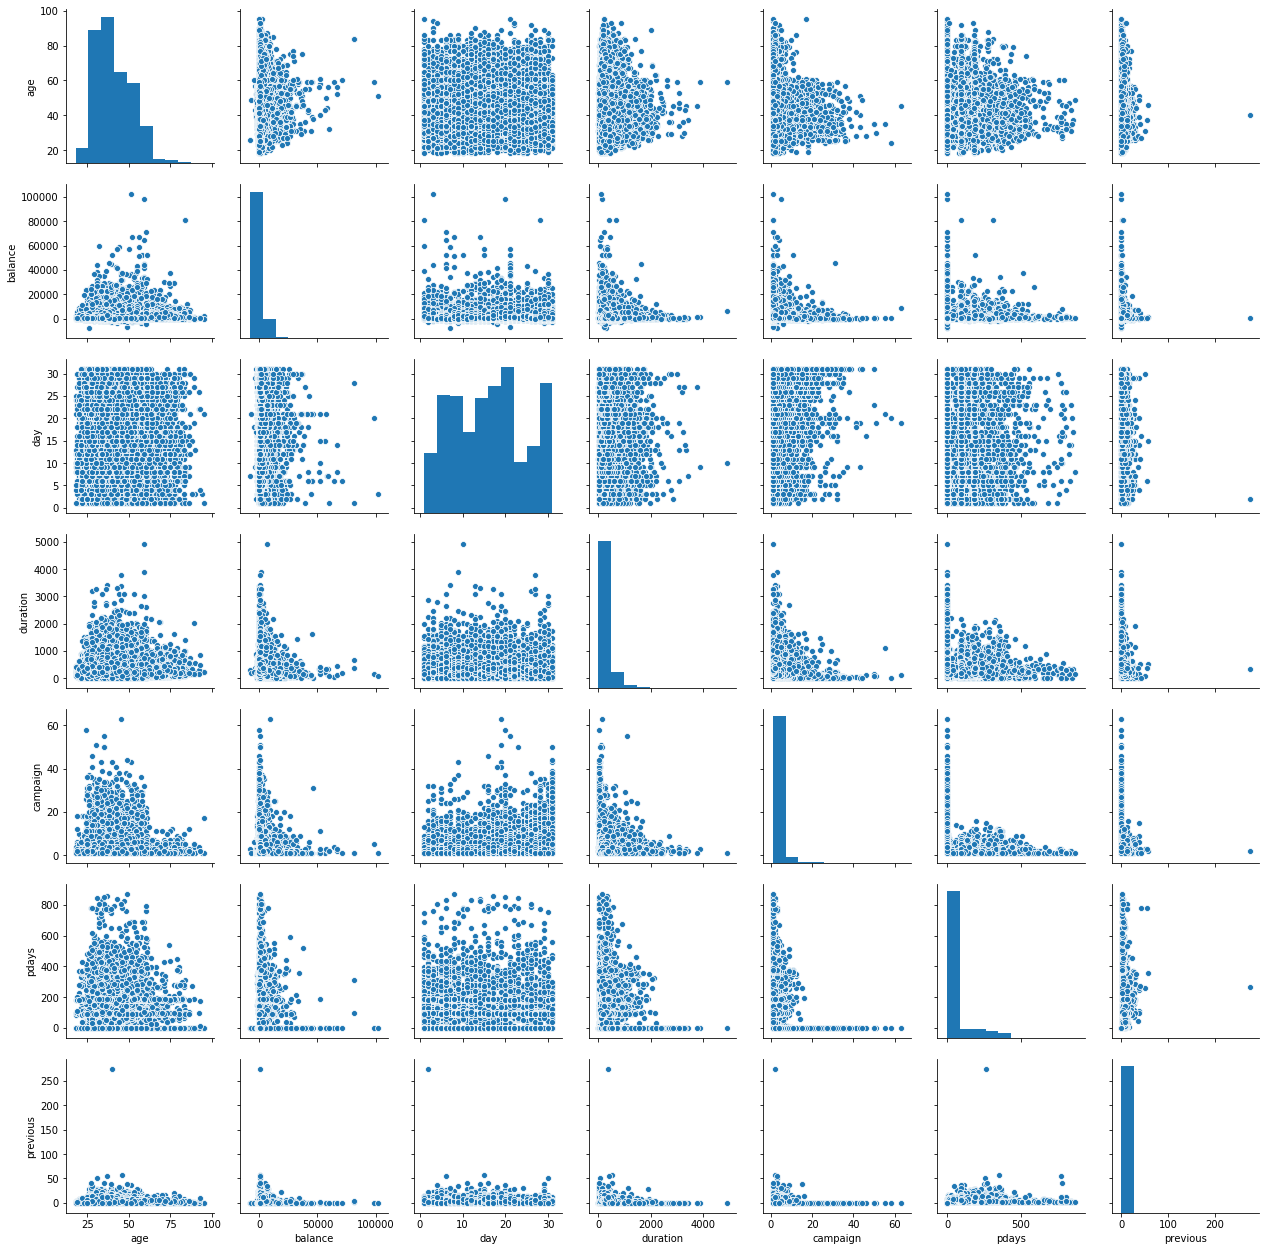

In [15]:
#Scatter plot between all variables
sns.pairplot(bankdata)

In [16]:
#Group numerical variables by mean for the classes of Y variable
np.round(bankdata.groupby(["Target"]).mean() ,1)

,age,balance,day,duration,campaign,pdays,previous
Target,,,,,,,
no,40.8,1303.7,15.9,221.2,2.8,36.4,0.5
yes,41.7,1804.3,15.2,537.3,2.1,68.7,1.2


**Observation:** 
The mean balance is higher for customers who subscribe to the term deposit compared to those who dont.
Number of days (pdays) that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed. 
Number of contacts performed before this campaign (previous) is also higher for customers who subscribed.

**All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit.**

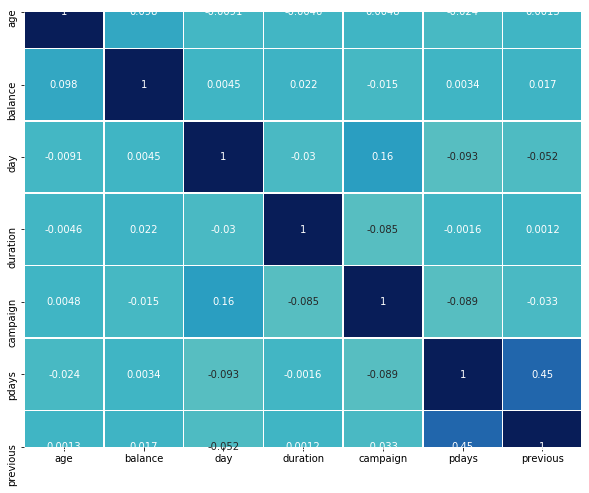

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(bankdata.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

**Observation:** There is a strong correlation between age and balance. Similarly there is an average correlation between pdays and previous. there is a slight correlation between day and campaign. Apart froom these, there are no significant correlations found. 

Text(0.5, 1.0, 'poutcome vs Subscription Countplot')

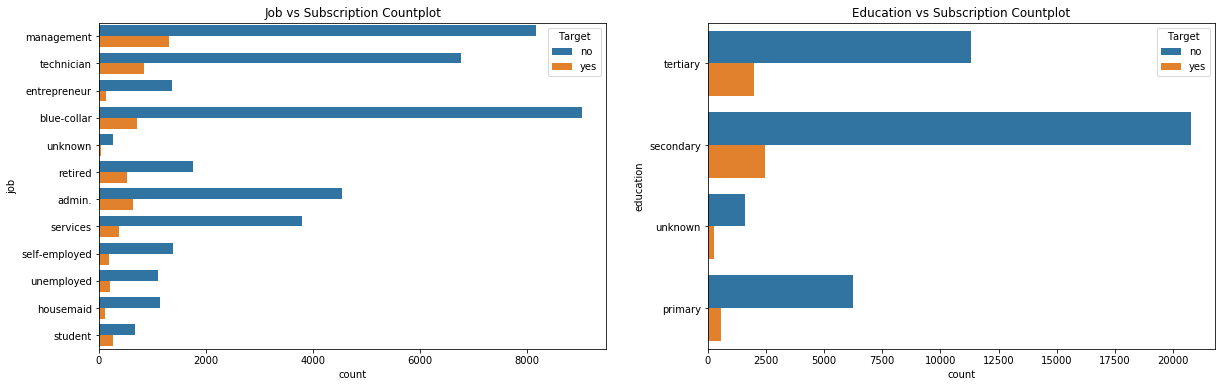

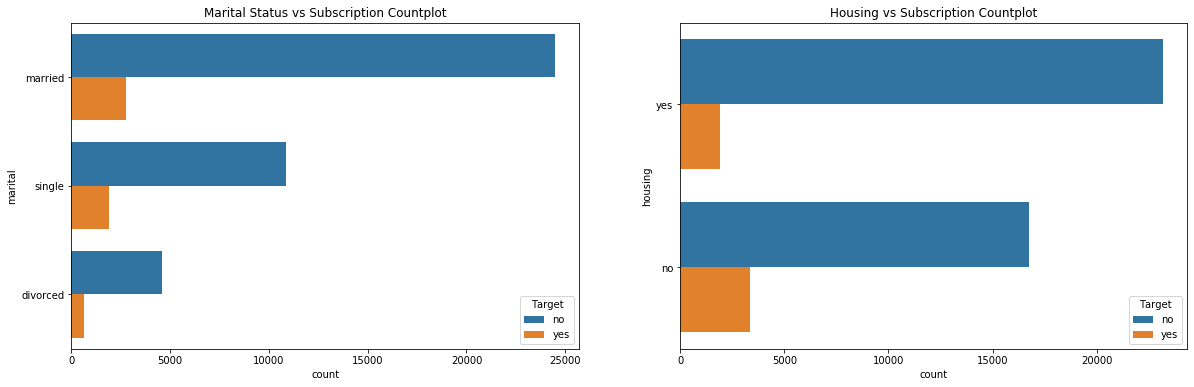

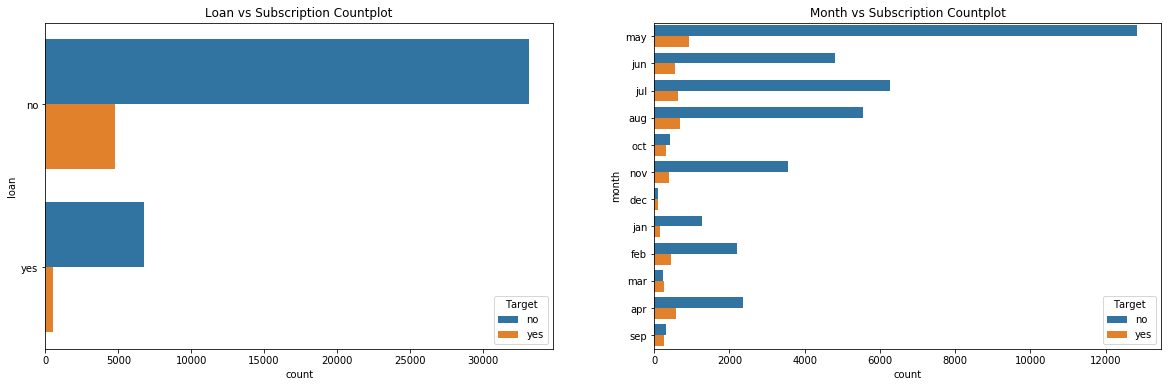

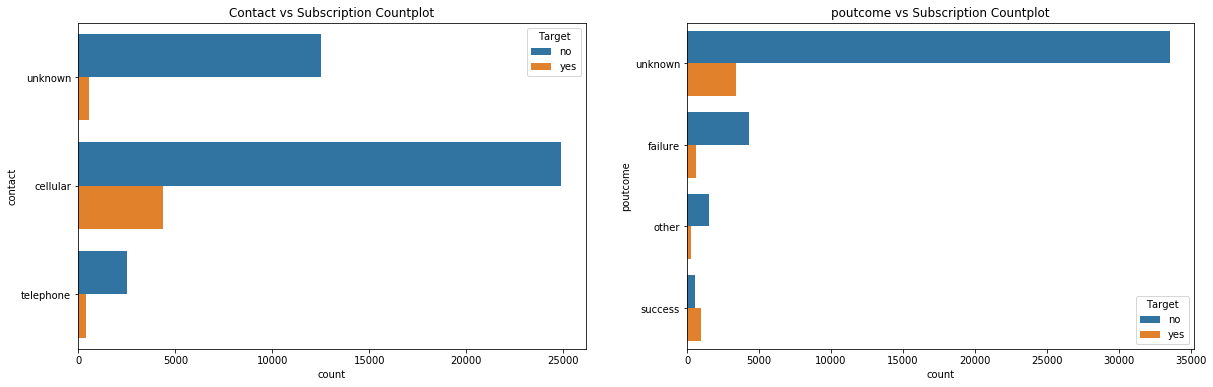

In [18]:
# Distribution of Categorical variables against Target

#Job
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(y='job',data=bankdata,hue='Target')
plt.title("Job vs Subscription Countplot")

#Education
plt.subplot(1, 2, 2)
sns.countplot(y='education',data=bankdata,hue='Target')
plt.title("Education vs Subscription Countplot")

#Marital
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(y='marital',data=bankdata,hue='Target')
plt.title("Marital Status vs Subscription Countplot")

#Housing
plt.subplot(1, 2, 2)
sns.countplot(y='housing',data=bankdata,hue='Target')
plt.title("Housing vs Subscription Countplot")

#Loan
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(y='loan',data=bankdata,hue='Target')
plt.title("Loan vs Subscription Countplot")

#month
plt.subplot(1, 2, 2)
sns.countplot(y='month',data=bankdata,hue='Target')
plt.title("Month vs Subscription Countplot")

#Contact
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
sns.countplot(y='contact',data=bankdata,hue='Target')
plt.title("Contact vs Subscription Countplot")

#poutcome
plt.subplot(1, 2, 2)
sns.countplot(y='poutcome',data=bankdata,hue='Target')
plt.title("poutcome vs Subscription Countplot")

**Observation:** 
* Based on the above plots, we can see that people with secondary and tertiary education have more chances of term deposit subscription. 
* More subscriptions are seen during the month of April, May, June, July, August. Bank should have the next campaign during these months. 
* The plot shows that enterpreneurs, unemployed, housemaids, self-employed have a lesser chance of opting for a term deposit. We would need to concentrate on other sectors. 
* Attributes housing, loan, contact, poutcome are significant in determining if the person would subscribe for a term deposit.

### 3e. Checking the presence of outliers

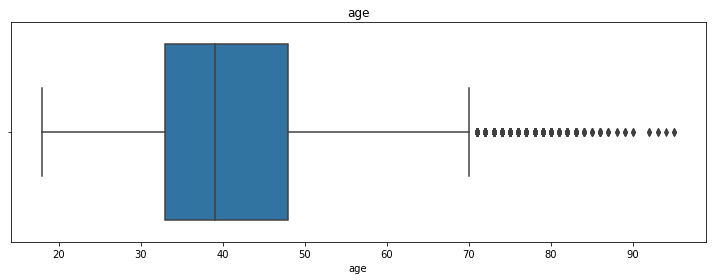

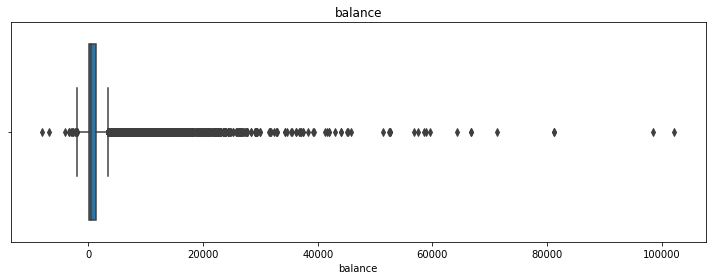

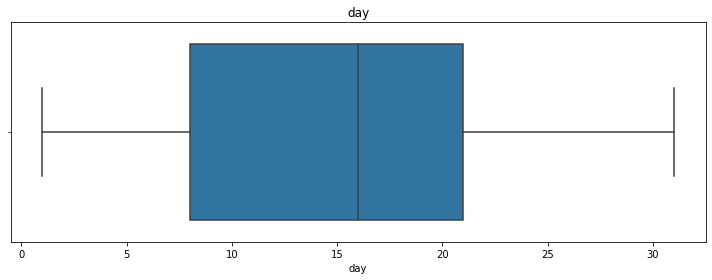

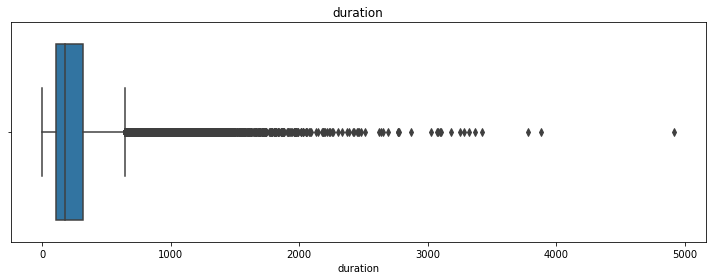

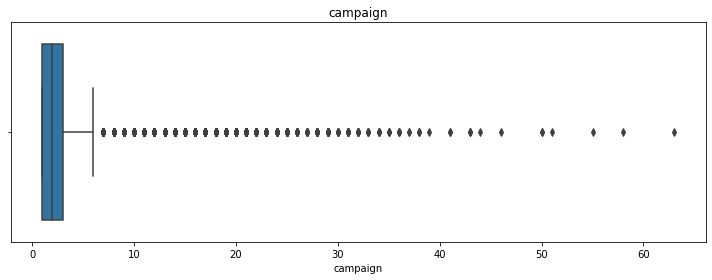

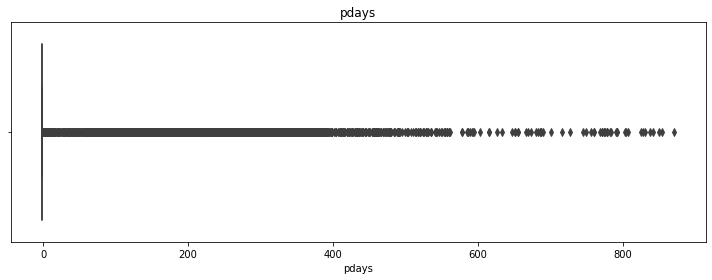

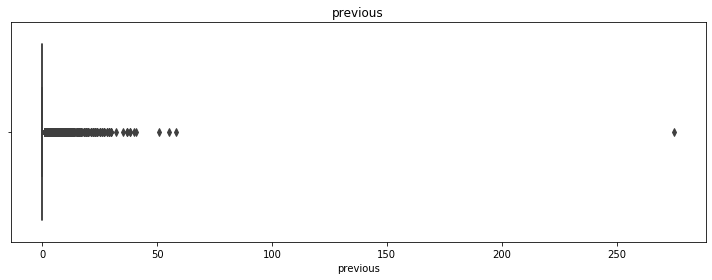

In [19]:
numeric_variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for col in numeric_variables:
    plt.figure(figsize=(10,4))
    sns.boxplot(bankdata[col])
    plt.title(col)
    plt.tight_layout()

In [20]:
numeric_variables = ['age', 'balance', 'day', 'duration', 'campaign']

for col in numeric_variables:  
# Quartiles
    print('1º Quartile: ', bankdata[col].quantile(q = 0.25))
    print('2º Quartile: ', bankdata[col].quantile(q = 0.50))
    print('3º Quartile: ', bankdata[col].quantile(q = 0.75))
    print('4º Quartile: ', bankdata[col].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    print(col, 'values above:  ', bankdata[col].quantile(q = 0.75) + 
                      1.5*(bankdata[col].quantile(q = 0.75) - bankdata[col].quantile(q = 0.25)), 'are outliers')

1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0
4º Quartile:  95.0
age values above:   70.5 are outliers
1º Quartile:  72.0
2º Quartile:  448.0
3º Quartile:  1428.0
4º Quartile:  102127.0
balance values above:   3462.0 are outliers
1º Quartile:  8.0
2º Quartile:  16.0
3º Quartile:  21.0
4º Quartile:  31.0
day values above:   40.5 are outliers
1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0
duration values above:   643.0 are outliers
1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0
campaign values above:   6.0 are outliers


In [21]:
print('Age:')
print('Number of outliers:   ', bankdata[bankdata['age'] > 70.5]['age'].count())
print('Number of clients:    ', len(bankdata))
#Outliers in %
print('Outliers are:         ', round(bankdata[bankdata['age'] > 70.5]['age'].count()*100/len(bankdata),2), '%', '\n')

print('Balance:')
print('Number of outliers:   ', bankdata[bankdata['balance'] > 3462]['balance'].count())
print('Number of clients:    ', len(bankdata))
#Outliers in %
print('Outliers are:         ', round(bankdata[bankdata['balance'] > 3462]['balance'].count()*100/len(bankdata),2), '%', '\n')

print('Duration:')
print('Number of outliers:   ', bankdata[bankdata['duration'] > 643]['duration'].count())
print('Number of clients:    ', len(bankdata))
#Outliers in %
print('Outliers are:         ', round(bankdata[bankdata['duration'] > 643]['duration'].count()*100/len(bankdata),2), '%', '\n')

print('Campaign:')
print('Numerber of outliers: ', bankdata[bankdata['campaign'] > 6]['campaign'].count())
print('Number of clients:    ', len(bankdata))
#Outliers in %
print('Outliers are:         ', round(bankdata[bankdata['campaign'] > 6]['campaign'].count()*100/len(bankdata),2), '%')

Age:
Number of outliers:    487
Number of clients:     45211
Outliers are:          1.08 % 

Balance:
Number of outliers:    4712
Number of clients:     45211
Outliers are:          10.42 % 

Duration:
Number of outliers:    3235
Number of clients:     45211
Outliers are:          7.16 % 

Campaign:
Numerber of outliers:  3064
Number of clients:     45211
Outliers are:          6.78 %


Outliers are detected using IQR (Inter Quartile Range). From the above data, it can be seen that 'age', balance, duration and 'campaign' have outliers.

But we also see that the maximum value of these outliers are not so unrealistic (eg: (max('age')=95 and max('campaign')=63). Hence, we need not remove them since the prediction model should represent the real world. This improves the generalizability of the model and makes it robust for real world situations. The outliers, therefore, are not removed.

## 4. Data Imputation and Encoding of Categorical Variables

There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

Variables with unknown/missing values are : 'education', 'job', 'contact', 'poutcome'. Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'contact', and 'poutcome'. We do this to see if the values are missing at random or is there a pattern in the missing values.

In [22]:
# Get the cross tab between job, education
pd.crosstab(bankdata['job'],bankdata['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4219,572,171
blue-collar,3758,5371,149,454
entrepreneur,183,542,686,76
housemaid,627,395,173,45
management,294,1121,7801,242
retired,795,984,366,119
self-employed,130,577,833,39
services,345,3457,202,150
student,44,508,223,163


In [23]:
bankdata['job'][bankdata['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64


**Inferring education from jobs :** From the cross-tabulation, it can be seen that people with management jobs usually have a tertiary degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'tertiary'. Similarly, 'job' = 'services' --> 'education' = 'secondary' and 'job' = 'housemaid' --> 'education' = 'primary'.

**Inferring jobs from education :** If 'education' = 'secondary' then the 'job' is usually 'blue-collar'. 

**Inferring jobs from age:** As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it doesn't make real world sense, we do not replace the missing values.

In [24]:
bankdata.loc[(bankdata['age']>60) & (bankdata['job']=='unknown'), 'job'] = 'retired'

bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='admin.'), 'education']        = 'secondary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='blue-collar'), 'education']  = 'secondary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='entrepreneur'), 'education'] = 'tertiary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='management'), 'education']   = 'tertiary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='services'), 'education']     = 'secondary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='housemaid'), 'education']    = 'primary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='technician'), 'education']   = 'secondary'
bankdata.loc[(bankdata['education']=='unknown') & (bankdata['job']=='self-employed'), 'education']   = 'tertiary'

bankdata.loc[(bankdata['job'] == 'unknown') & (bankdata['education']=='primary'), 'job']   = 'blue-collar'
bankdata.loc[(bankdata['job'] == 'unknown') & (bankdata['education']=='secondary'), 'job'] = 'blue-collar'
bankdata.loc[(bankdata['job'] == 'unknown') & (bankdata['education']=='tertiary'), 'job']  = 'management'
bankdata.loc[(bankdata['job'] == 'unknown') & (bankdata['education']=='professional.course'), 'job'] = 'technician'

In [25]:
# Get the cross tab between job, education
pd.crosstab(bankdata['job'],bankdata['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4390,572,0
blue-collar,3808,5891,149,0
entrepreneur,183,542,762,0
housemaid,672,395,173,0
management,294,1121,8077,0
retired,796,989,371,130
self-employed,130,577,872,0
services,345,3607,202,0
student,44,508,223,163


In [26]:
# Get the count of contact column
bankdata['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [27]:
# Crosstab of Target and poutcome column
pd.crosstab(bankdata['poutcome'],bankdata['Target'])

Target,no,yes
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33573,3386


In [28]:
# Crosstab of campaign and poutcome column
pd.crosstab(bankdata['poutcome'],bankdata['campaign'])

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,2458,1374,500,242,140,87,52,22,10,6,...,0,0,0,0,0,0,0,0,0,0
other,718,500,262,131,86,55,34,24,13,4,...,0,0,0,0,0,0,0,0,0,0
success,837,402,149,51,30,21,11,8,1,0,...,0,0,0,0,0,0,0,0,0,0
unknown,13531,10229,4610,3098,1508,1128,638,486,303,256,...,1,2,3,1,1,2,1,1,1,1


In [29]:
pd.crosstab(bankdata['pdays'],bankdata['previous'])

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
pdays,,,,,,,,,,,,,,,,,,,,,
-1,36954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,1,2,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,14,8,7,1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Observation:** From the above table, it is seen that the attribute pdays is -1 when the client has not been contacted previously(previous=0). So we could replace the negative value in pdays with 0.

In [30]:
bankdata.loc[bankdata['pdays'] == -1, 'pdays'] = 0

In [31]:
pd.crosstab(bankdata['pdays'],bankdata['previous'])

previous,0,1,2,3,4,5,6,7,8,9,...,32,35,37,38,40,41,51,55,58,275
pdays,,,,,,,,,,,,,,,,,,,,,
0,36954,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,1,2,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,14,8,7,1,4,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
838,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
850,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Get the olumn names of the dataframe
bankdata_cols = list(bankdata)

Remove the attribute duration as per the input data description since it highly affects the Target and should be used only for benchmarking and not for predictive modelling.

In [33]:
bankdata.drop(['duration'], axis=1, inplace=True)

In [34]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,1,0,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,0,unknown,no


In [35]:
#function to create group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe

age(bankdata);

In [36]:
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,3,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,0,unknown,no
1,2,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,0,unknown,no
2,2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,0,unknown,no
3,2,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,1,0,0,unknown,no
4,2,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,0,unknown,no


In [37]:
replaceStruct = {
                "job":       {"blue-collar": 1, "management": 2, "technician":3, "admin.":4, "services": 5, 
                              "retired": 6, "self-employed":7, "entrepreneur": 8, "unemployed": 9, "housemaid": 10, 
                              "student": 11, "unknown":12 }, 
                "education": {"primary": 1, "secondary":2 , "tertiary": 3, "unknown": 4 },
                "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, 
                              "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12 },
                "poutcome":  {"success": 1, "failure": 2, "other": 3, "unknown": 4 },
                "Target":    {"no": 0, "yes": 1 } 
                }
oneHotCols=["marital","default","housing","loan","contact"]

In [38]:
#bankdata = pd.get_dummies(data = bankdata, columns = ['job'] , prefix = ['job'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, columns = ['marital'] , prefix = ['marital'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, columns = ['education'], prefix = ['education'], drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, columns = ['default'] , prefix = ['default'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, columns = ['housing'] , prefix = ['housing'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, columns = ['loan'] , prefix = ['loan'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, prefix = ['contact'] , columns = ['contact'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, prefix = ['month'] , columns = ['month'] , drop_first = True)

#bankdata = pd.get_dummies(data = bankdata, prefix = ['poutcome'] , columns = ['poutcome'] , drop_first = True)

In [39]:
creditData=bankdata.replace(replaceStruct)
creditData=pd.get_dummies(creditData, columns=oneHotCols)
creditData.head(10)

,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,3,2,3,2143,5,5,1,0,0,4,...,0,1,0,0,1,1,0,0,0,1
1,2,3,2,29,5,5,1,0,0,4,...,1,1,0,0,1,1,0,0,0,1
2,2,8,2,2,5,5,1,0,0,4,...,0,1,0,0,1,0,1,0,0,1
3,2,1,2,1506,5,5,1,0,0,4,...,0,1,0,0,1,1,0,0,0,1
4,2,12,4,1,5,5,1,0,0,4,...,1,1,0,1,0,1,0,0,0,1
5,2,2,3,231,5,5,1,0,0,4,...,0,1,0,0,1,1,0,0,0,1
6,1,2,3,447,5,5,1,0,0,4,...,1,1,0,0,1,0,1,0,0,1
7,2,8,3,2,5,5,1,0,0,4,...,0,0,1,0,1,1,0,0,0,1
8,3,6,1,121,5,5,1,0,0,4,...,0,1,0,0,1,1,0,0,0,1
9,2,3,2,593,5,5,1,0,0,4,...,1,1,0,0,1,1,0,0,0,1


In [40]:
creditData.columns

Index(['age', 'job', 'education', 'balance', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'Target', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown'],
      dtype='object')

## 5. Classification Models

We would be using the following supervised learning classification algorithms - Logistic Regression, KNN, Naive Bayes, Support Vector Machine to create the prediction models

In [41]:
# Split Train and Test Data. 70% train data and 30% test data

X = creditData.drop(["Target"],axis=1)
Y = creditData["Target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=100)

x_train.head()

,age,job,education,balance,day,month,campaign,pdays,previous,poutcome,...,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
18391,2,1,2,4853,31,7,2,0,0,4,...,0,1,0,1,0,1,0,1,0,0
13056,1,4,2,-378,8,7,1,0,0,4,...,1,1,0,1,0,0,1,1,0,0
13415,3,3,3,3440,9,7,1,0,0,4,...,0,1,0,0,1,1,0,1,0,0
21022,2,2,3,668,14,8,2,0,0,4,...,1,1,0,1,0,1,0,1,0,0
24510,3,2,3,830,17,11,1,138,2,2,...,0,1,0,1,0,1,0,1,0,0


In [42]:
#Check the split of the data

print("{0:0.2f}% data is in training set".format((len(x_train)/len(creditData.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(creditData.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [43]:
y_train.value_counts()

0    27937
1     3710
Name: Target, dtype: int64

**5a. Logistic Regression**

In [44]:
#Build the logistic regression model
logisticRegr = LogisticRegression()

In [45]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Use score method to get accuracy of train model
logreg_train_score = logisticRegr.score(x_train, y_train)
print('Train Accuracy Score:', np.round((logreg_train_score),4))

# Use score method to get accuracy of test model
logreg_test_score = logisticRegr.score(x_test, y_test)
print('Test Accuracy Score:', np.round((logreg_test_score),4))

Train Accuracy Score: 0.8834
Test Accuracy Score: 0.8839


**Predict for Training Data**

In [47]:
#Predict for train set
pred_train = logisticRegr.predict(x_train)

#Confusion Matrix
logreg_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_train.index.name = "Predicted"
logreg_cm_train.columns.name = "True"
logreg_cm_train

True,No,Yes
Predicted,,
No,27910,3663
Yes,27,47


In [48]:
#Predict for test set
pred_test = logisticRegr.predict(x_test)

#Confusion Matrix
logreg_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test).T,index=['No', 'Yes'], columns=['No', 'Yes'])
logreg_cm_test.index.name = "Predicted"
logreg_cm_test.columns.name = "True"
logreg_cm_test

True,No,Yes
Predicted,,
No,11975,1565
Yes,10,14


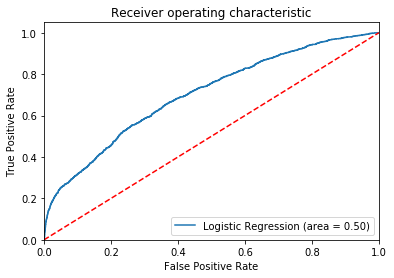

In [49]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [50]:
#Calculate auc score
auc_score = metrics.roc_auc_score(y_test, logisticRegr.predict_proba(x_test)[:,1])
round( float( auc_score ), 2 )

0.7

In [51]:
# summarize the fit of the model
logreg_accuracy  = np.round( metrics.accuracy_score( y_test, pred_test ), 4 )
logreg_precision = np.round( metrics.precision_score( y_test, pred_test ), 4 )
logreg_recall    = np.round( metrics.recall_score( y_test, pred_test ), 4 )
logreg_f1score   = np.round( metrics.f1_score( y_test, pred_test ), 4 )
print( 'Total Accuracy : ', logreg_accuracy)
print('\n')
print('Metrics Classification Report \n',metrics.classification_report(y_test, pred_test))

Total Accuracy :  0.8839


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     11985
           1       0.58      0.01      0.02      1579

    accuracy                           0.88     13564
   macro avg       0.73      0.50      0.48     13564
weighted avg       0.85      0.88      0.83     13564



**5b. Gaussian Naive Bayes Model**

In [52]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(x_train, y_train)

# Use score method to get accuracy of train model
NB_train_score = model.score(x_train, y_train)
print('Train Accuracy Score:', np.round((NB_train_score),4))

# Use score method to get accuracy of test model
NB_test_score = model.score(x_test, y_test)
print('Test Accuracy Score:', np.round((NB_test_score),4))

Train Accuracy Score: 0.7469
Test Accuracy Score: 0.7439


In [53]:
#Predict for train set
pred_train_NB = model.predict(x_train)

#Confusion Matrix
NB_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_train.index.name = "Predicted"
NB_cm_train.columns.name = "True"
NB_cm_train

True,No,Yes
Predicted,,
No,21638,1711
Yes,6299,1999


In [54]:
# make predictions for test 
expected = y_test
pred_test_NB = model.predict(x_test)

#Confusion Matrix
NB_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_NB).T,index=['No', 'Yes'], columns=['No', 'Yes'])
NB_cm_test.index.name = "Predicted"
NB_cm_test.columns.name = "True"
NB_cm_test

True,No,Yes
Predicted,,
No,9269,758
Yes,2716,821


In [55]:
#Calculate auc score
NB_auc_score = metrics.roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
round( float( NB_auc_score ), 2 )

0.71

In [56]:
# summarize the fit of the model
NB_accuracy = np.round( metrics.accuracy_score( expected, pred_test_NB ), 4 )
NB_precision = np.round( metrics.precision_score( expected, pred_test_NB ), 4 )
NB_recall    = np.round( metrics.recall_score( expected, pred_test_NB ), 4 )
NB_f1score   = np.round( metrics.f1_score( expected, pred_test_NB ), 4 )
print( 'Total Accuracy : ', NB_accuracy)
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(expected, pred_test_NB))

Total Accuracy :  0.7439


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.77      0.84     11985
           1       0.23      0.52      0.32      1579

    accuracy                           0.74     13564
   macro avg       0.58      0.65      0.58     13564
weighted avg       0.84      0.74      0.78     13564



**5c. K-Nearest Neighbours Classification**

**Find optimal value of k**

In [57]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [58]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 17


In [59]:
# Invoking the KNN function to create the model
# fitting the model in the training data set

NNH = KNeighborsClassifier(n_neighbors= 17 , weights = 'distance') #apply the optimal k value here
NNH.fit(x_train, y_train)

# Use score method to get accuracy of train model
KNN_train_score = NNH.score(x_train, y_train)
print('Train Accuracy Score:', np.round((KNN_train_score),4))

# Use score method to get accuracy of test model
KNN_test_score = NNH.score(x_test, y_test)
print('Test Accuracy Score:', np.round((KNN_test_score),4))

Train Accuracy Score: 0.9998
Test Accuracy Score: 0.882


In [60]:
#Predict for train set
pred_train_KNN = NNH.predict(x_train)

#Confusion Matrix
KNN_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_train.index.name = "Predicted"
KNN_cm_train.columns.name = "True"
KNN_cm_train

True,No,Yes
Predicted,,
No,27937,5
Yes,0,3705


In [61]:
#make predictions for test set
pred_test_KNN = NNH.predict(x_test)

#Confusion Matrix
KNN_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_KNN).T,index=['No', 'Yes'], columns=['No', 'Yes'])
KNN_cm_test.index.name = "Predicted"
KNN_cm_test.columns.name = "True"
KNN_cm_test

True,No,Yes
Predicted,,
No,11851,1466
Yes,134,113


In [62]:
#Calculate auc score
KNN_auc_score = metrics.roc_auc_score(y_test, NNH.predict_proba(x_test)[:,1])
round( float( KNN_auc_score ), 2 )

0.63

In [63]:
# summarize the fit of the model

KNN_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_KNN ), 4 )
KNN_precision = np.round( metrics.precision_score( y_test, pred_test_KNN ), 4 )
KNN_recall    = np.round( metrics.recall_score( y_test, pred_test_KNN ), 4 )
KNN_f1score   = np.round( metrics.f1_score( y_test, pred_test_KNN ), 4 )
print( 'Total Accuracy : ', KNN_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_KNN))

Total Accuracy :  0.882


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     11985
           1       0.46      0.07      0.12      1579

    accuracy                           0.88     13564
   macro avg       0.67      0.53      0.53     13564
weighted avg       0.84      0.88      0.84     13564



**5d. Support Vector Machine**

In [64]:
# Building a Support Vector Machine on train data
# fitting the model in the training data set

svc_model = SVC(kernel='sigmoid')
svc_model.fit(x_train, y_train)

# Use score method to get accuracy of train model
SVC_train_score = svc_model.score(x_train, y_train)
print('Train Accuracy Score:', np.round((SVC_train_score),4))

# Use score method to get accuracy of test model
SVC_test_score = svc_model.score(x_test, y_test)
print('Test Accuracy Score:', np.round((SVC_test_score),4))

Train Accuracy Score: 0.7904
Test Accuracy Score: 0.7868


In [65]:
#Predict for train set
pred_train_SVC = svc_model.predict(x_train)

#Confusion Matrix
SVC_cm_train = pd.DataFrame(confusion_matrix(y_train,pred_train_SVC).T,index=['No', 'Yes'], columns=['No', 'Yes'])
SVC_cm_train.index.name = "Predicted"
SVC_cm_train.columns.name = "True"
SVC_cm_train

True,No,Yes
Predicted,,
No,24625,3322
Yes,3312,388


In [66]:
#make predictions for test set
pred_test_SVC = svc_model.predict(x_test)

#Confusion Matrix
SVC_cm_test = pd.DataFrame(confusion_matrix(y_test,pred_test_SVC).T,index=['No', 'Yes'], columns=['No', 'Yes'])
SVC_cm_test.index.name = "Predicted"
SVC_cm_test.columns.name = "True"
SVC_cm_test

True,No,Yes
Predicted,,
No,10518,1425
Yes,1467,154


In [67]:
# summarize the fit of the model

SVC_accuracy = np.round( metrics.accuracy_score( y_test, pred_test_SVC ), 4 )
SVC_precision = np.round( metrics.precision_score( y_test, pred_test_SVC ), 4 )
SVC_recall    = np.round( metrics.recall_score( y_test, pred_test_SVC ), 4 )
SVC_f1score   = np.round( metrics.f1_score( y_test, pred_test_SVC ), 4 )
print( 'Total Accuracy : ', SVC_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, pred_test_SVC))

Total Accuracy :  0.7868


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     11985
           1       0.10      0.10      0.10      1579

    accuracy                           0.79     13564
   macro avg       0.49      0.49      0.49     13564
weighted avg       0.79      0.79      0.79     13564



Compare the classification metrics of all models

In [68]:
#Store the metrics results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Model':['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector Machine'], 
                          'Training Set Accuracy': [logreg_train_score, NB_train_score, KNN_train_score, SVC_train_score],
                          'Testing Set Accuracy': [logreg_test_score, NB_test_score, KNN_test_score, SVC_test_score],
                          'Model Accuracy': [logreg_accuracy, NB_accuracy, KNN_accuracy, SVC_accuracy],
                          'Precision': [logreg_precision, NB_precision, KNN_precision, SVC_precision],
                          'Recall': [logreg_recall, NB_recall, KNN_recall, SVC_recall],
                          'F1-score': [logreg_f1score, NB_f1score, KNN_f1score, SVC_f1score]})
resultsDf

,Model,Training Set Accuracy,Testing Set Accuracy,Model Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.883401,0.883884,0.8839,0.5833,0.0089,0.0175
1,Naive Bayes,0.746895,0.743881,0.7439,0.2321,0.5199,0.3210
2,KNN,0.999842,0.882041,0.8820,0.4575,0.0716,0.1238
3,Support Vector Machine,0.790375,0.786789,0.7868,0.0950,0.0975,0.0962


**Observation:** 

## 6. Ensemble Techniques

We would be using the following ensemble techniques- Decision Trees, Random Forest, Bagging Classifier, AdaBoosting Clasifier, Gradient Boosting Classifier.

**6a. Decision Trees**

In [69]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

model_entropy=DecisionTreeClassifier(criterion='entropy')

In [70]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [71]:
print("Model Accuray on Train Data: ", model_entropy.score(x_train, y_train))  # performance on train data
print("Model Accuray on Test Data:  ", model_entropy.score(x_test, y_test))  # performance on test data

Model Accuray on Train Data:  0.9998420071412772
Model Accuray on Test Data:   0.8330875847832497


There is a high degree of overfitting in the model due to which the test accuracy drops drastically. Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [72]:
dt_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
dt_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

**Visualizing the Tree**

In [80]:
# have commented out since the installed graphviz has some issues. keeps giving "GraphViz's executables not found" error

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

xvar = creditData.drop('Target', axis=1)
feature_cols = xvar.columns

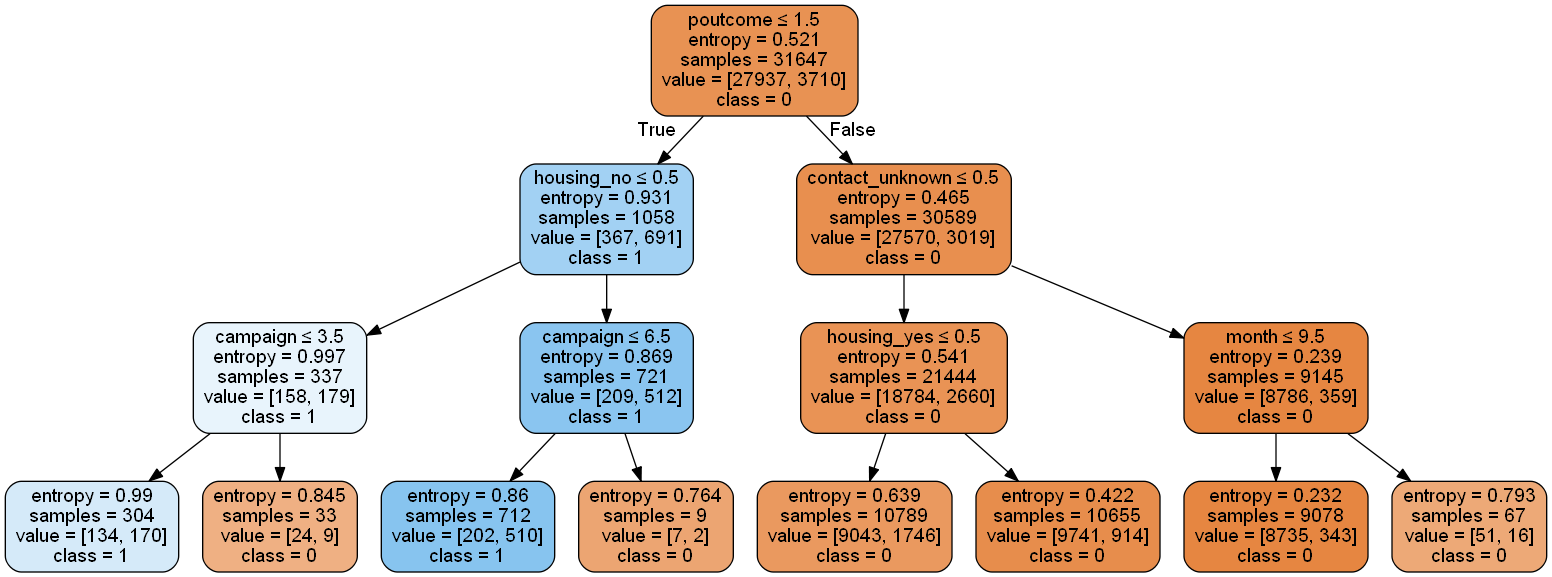

In [81]:
dot_data = StringIO()
export_graphviz(dt_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_data.png')
Image(graph.create_png())

In [75]:
# Use score method to get accuracy of train model
dt_train_score = dt_pruned.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((dt_train_score),4))

# Use score method to get accuracy of test model
dt_test_score = dt_pruned.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((dt_test_score),4))

Pruned Accuracy Score for Train data: 0.8936
Pruned Accuracy Score for Test data : 0.8929


In [76]:
#Predict for train set
dt_train = dt_pruned.predict(x_train)

#Confusion Matrix
dt_cm_train = pd.DataFrame(confusion_matrix(y_train,dt_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dt_cm_train.index.name = "Predicted"
dt_cm_train.columns.name = "True"
dt_cm_train

True,No,Yes
Predicted,,
No,27601,3030
Yes,336,680


In [77]:
#make predictions for test set
dt_pred = dt_pruned.predict(x_test)

#Confusion Matrix
dt_cm_test = pd.DataFrame(confusion_matrix(y_test,dt_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
dt_cm_test.index.name = "Predicted"
dt_cm_test.columns.name = "True"
dt_cm_test

True,No,Yes
Predicted,,
No,11829,1297
Yes,156,282


In [78]:
# summarize the fit of the model

dt_accuracy = np.round( metrics.accuracy_score( y_test, dt_pred ), 4 )
dt_precision = np.round( metrics.precision_score( y_test, dt_pred ), 4 )
dt_recall    = np.round( metrics.recall_score( y_test, dt_pred ), 4 )
dt_f1score   = np.round( metrics.f1_score( y_test, dt_pred ), 4 )
print( 'Total Accuracy : ', dt_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, dt_pred))

Total Accuracy :  0.8929


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.64      0.18      0.28      1579

    accuracy                           0.89     13564
   macro avg       0.77      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



In [82]:
## Calculating feature importance

feat_importance = dt_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, dt_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.646762
contact_unknown,0.217916
housing_yes,0.104420
month,0.012454
housing_no,0.011479
campaign,0.006970
default_no,0.000000
contact_telephone,0.000000
contact_cellular,0.000000
loan_yes,0.000000


**6b. Random Forest**

In [83]:
#Build and fit Random Forest
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [84]:
# Use score method to get accuracy of train model
rf_train_score = rfcl.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((rf_train_score),4))

# Use score method to get accuracy of test model
rf_test_score = rfcl.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((rf_test_score),4))

Pruned Accuracy Score for Train data: 0.9989
Pruned Accuracy Score for Test data : 0.8914


In [85]:
#Predict for train set
rf_train = rfcl.predict(x_train)

#Confusion Matrix
rf_cm_train = pd.DataFrame(confusion_matrix(y_train,rf_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rf_cm_train.index.name = "Predicted"
rf_cm_train.columns.name = "True"
rf_cm_train

True,No,Yes
Predicted,,
No,27936,34
Yes,1,3676


In [86]:
#make predictions for test set
rf_pred = rfcl.predict(x_test)

#Confusion Matrix
rf_cm_test = pd.DataFrame(confusion_matrix(y_test,rf_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
rf_cm_test.index.name = "Predicted"
rf_cm_test.columns.name = "True"
rf_cm_test

True,No,Yes
Predicted,,
No,11755,1243
Yes,230,336


In [87]:
# summarize the fit of the model

rf_accuracy = np.round( metrics.accuracy_score( y_test, rf_pred ), 4 )
rf_precision = np.round( metrics.precision_score( y_test, rf_pred ), 4 )
rf_recall    = np.round( metrics.recall_score( y_test, rf_pred ), 4 )
rf_f1score   = np.round( metrics.f1_score( y_test, rf_pred ), 4 )
print( 'Total Accuracy : ', rf_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, rf_pred))

Total Accuracy :  0.8914


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11985
           1       0.59      0.21      0.31      1579

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



**6c. AdaBoost Algorithm**

In [88]:
#Build and fit Ada Boost Algorithm
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [89]:
# Use score method to get accuracy of train model
ab_train_score = abcl.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((ab_train_score),4))

# Use score method to get accuracy of test model
ab_test_score = abcl.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((ab_test_score),4))

Pruned Accuracy Score for Train data: 0.8931
Pruned Accuracy Score for Test data : 0.8918


In [90]:
#Predict for train set
ab_train = abcl.predict(x_train)

#Confusion Matrix
ab_cm_train = pd.DataFrame(confusion_matrix(y_train,ab_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
ab_cm_train.index.name = "Predicted"
ab_cm_train.columns.name = "True"
ab_cm_train

True,No,Yes
Predicted,,
No,27694,3141
Yes,243,569


In [91]:
#make predictions for test set
ab_pred = abcl.predict(x_test)

#Confusion Matrix
ab_cm_test = pd.DataFrame(confusion_matrix(y_test,ab_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
ab_cm_test.index.name = "Predicted"
ab_cm_test.columns.name = "True"
ab_cm_test

True,No,Yes
Predicted,,
No,11863,1345
Yes,122,234


In [92]:
# summarize the fit of the model

ab_accuracy = np.round( metrics.accuracy_score( y_test, ab_pred ), 4 )
ab_precision = np.round( metrics.precision_score( y_test, ab_pred ), 4 )
ab_recall    = np.round( metrics.recall_score( y_test, ab_pred ), 4 )
ab_f1score   = np.round( metrics.f1_score( y_test, ab_pred ), 4 )
print( 'Total Accuracy : ', ab_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, ab_pred))

Total Accuracy :  0.8918


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.66      0.15      0.24      1579

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



**6d. Bagging Classifier Algorithm**

In [93]:
#Build and fit Bagging Classifer
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [94]:
# Use score method to get accuracy of train model
bg_train_score = bgcl.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((bg_train_score),4))

# Use score method to get accuracy of test model
bg_test_score = bgcl.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((bg_test_score),4))

Pruned Accuracy Score for Train data: 0.9833
Pruned Accuracy Score for Test data : 0.8899


In [95]:
#Predict for train set
bg_train = bgcl.predict(x_train)

#Confusion Matrix
bg_cm_train = pd.DataFrame(confusion_matrix(y_train,bg_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bg_cm_train.index.name = "Predicted"
bg_cm_train.columns.name = "True"
bg_cm_train

True,No,Yes
Predicted,,
No,27927,520
Yes,10,3190


In [96]:
#make predictions for test set
bg_pred = bgcl.predict(x_test)

#Confusion Matrix
bg_cm_test = pd.DataFrame(confusion_matrix(y_test,bg_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
bg_cm_test.index.name = "Predicted"
bg_cm_test.columns.name = "True"
bg_cm_test

True,No,Yes
Predicted,,
No,11661,1169
Yes,324,410


In [97]:
# summarize the fit of the model

bg_accuracy = np.round( metrics.accuracy_score( y_test, bg_pred ), 4 )
bg_precision = np.round( metrics.precision_score( y_test, bg_pred ), 4 )
bg_recall    = np.round( metrics.recall_score( y_test, bg_pred ), 4 )
bg_f1score   = np.round( metrics.f1_score( y_test, bg_pred ), 4 )
print( 'Total Accuracy : ', dt_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, bg_pred))

Total Accuracy :  0.8929


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     11985
           1       0.56      0.26      0.35      1579

    accuracy                           0.89     13564
   macro avg       0.73      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564



**6e. Gradient Boosting Algorithm**

In [98]:
#Build and fit gradient boosting algorithm
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [99]:
# Use score method to get accuracy of train model
gb_train_score = gbcl.score(x_train, y_train)
print('Pruned Accuracy Score for Train data:', np.round((gb_train_score),4))

# Use score method to get accuracy of test model
gb_test_score = gbcl.score(x_test, y_test)
print('Pruned Accuracy Score for Test data :', np.round((gb_test_score),4))

Pruned Accuracy Score for Train data: 0.8957
Pruned Accuracy Score for Test data : 0.8936


In [100]:
#Predict for train set
gb_train = gbcl.predict(x_train)

#Confusion Matrix
gb_cm_train = pd.DataFrame(confusion_matrix(y_train,gb_train).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gb_cm_train.index.name = "Predicted"
gb_cm_train.columns.name = "True"
gb_cm_train

True,No,Yes
Predicted,,
No,27665,3029
Yes,272,681


In [101]:
#make predictions for test set
gb_pred = gbcl.predict(x_test)

#Confusion Matrix
gb_cm_test = pd.DataFrame(confusion_matrix(y_test,gb_pred).T,index=['No', 'Yes'], columns=['No', 'Yes'])
gb_cm_test.index.name = "Predicted"
gb_cm_test.columns.name = "True"
gb_cm_test

True,No,Yes
Predicted,,
No,11849,1307
Yes,136,272


In [102]:
# summarize the fit of the model

gb_accuracy = np.round( metrics.accuracy_score( y_test, gb_pred ), 4 )
gb_precision = np.round( metrics.precision_score( y_test, gb_pred ), 4 )
gb_recall    = np.round( metrics.recall_score( y_test, gb_pred ), 4 )
gb_f1score   = np.round( metrics.f1_score( y_test, gb_pred ), 4 )
print( 'Total Accuracy : ', dt_accuracy )
print('\n')
print('Metrics Classification Report \n', metrics.classification_report(y_test, gb_pred))

Total Accuracy :  0.8929


Metrics Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.67      0.17      0.27      1579

    accuracy                           0.89     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.89      0.86     13564



## 7. Model Comparison

In [103]:
#Add the metrics of ensemble techniques to the classification algorithms metrics dataframe

tempresultsDf = pd.DataFrame({'Model':['Decision Tree', 'Random Forest', 'Ada Boost', 'Bagging', 'Gradient Boost'], 
                              'Training Set Accuracy': [dt_train_score, rf_train_score, ab_train_score, bg_train_score,
                                                  gb_train_score],
                              'Testing Set Accuracy': [dt_test_score, rf_test_score, ab_test_score, bg_test_score,
                                                 gb_test_score],
                              'Model Accuracy': [dt_accuracy, rf_accuracy, ab_accuracy, bg_accuracy, gb_accuracy],
                              'Precision': [dt_precision, rf_precision, ab_precision, bg_precision, gb_precision],
                              'Recall': [dt_recall, rf_recall, ab_recall, bg_recall, gb_recall],
                              'F1-score': [dt_f1score, rf_f1score, ab_f1score, bg_f1score, gb_f1score]})

resultsDf = pd.concat([resultsDf, tempresultsDf])
resultsDf

,Model,Training Set Accuracy,Testing Set Accuracy,Model Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.883401,0.883884,0.8839,0.5833,0.0089,0.0175
1,Naive Bayes,0.746895,0.743881,0.7439,0.2321,0.5199,0.3210
2,KNN,0.999842,0.882041,0.8820,0.4575,0.0716,0.1238
3,Support Vector Machine,0.790375,0.786789,0.7868,0.0950,0.0975,0.0962
0,Decision Tree,0.893639,0.892878,0.8929,0.6438,0.1786,0.2796
1,Random Forest,0.998894,0.891404,0.8914,0.5936,0.2128,0.3133
2,Ada Boost,0.893070,0.891846,0.8918,0.6573,0.1482,0.2419
3,Bagging,0.983253,0.889929,0.8899,0.5586,0.2597,0.3545
4,Gradient Boost,0.895693,0.893615,0.8936,0.6667,0.1723,0.2738


**Observation:**

From the above tabular column, we can see that gradient boost has a precision of 66.67% and accuracy of 89.36% followed by adaboost (precision - 65.73%, accuracy - 89.18%) and decision tree (precision - 64.38%, accuracy - 89.29).

* **1. Gradient Boost**
* **2. Ada Boost**
* **3. Decision Tree**
* **4. Logistic Regression**

The features that would impact the term deposit subscription are - **poutcome, contact, housing, month, campaign.** This is taken from the feature importance of decision tree. This is inline with the findings of EDA - 

* Based on the above plots, we can see that people with secondary and tertiary education have more chances of term deposit subscription. 
* More subscriptions are seen during the month of April, May, June, July, August. Bank should have the next campaign during these months. 
* The plot shows that enterpreneurs, unemployed, housemaids, self-employed have a lesser chance of opting for a term deposit. We would need to concentrate on other sectors. 
* Attributes housing, loan, contact, poutcome are significant in determining if the person would subscribe for a term deposit.
* The mean balance is higher for customers who subscribe to the term deposit compared to those who dont.
* Number of days (pdays) that passed by after the client was last contacted from a previous campaign is higher for people who have subscribed. 
* Number of contacts performed before this campaign (previous) is also higher for customers who subscribed.
* All of the above facts indicate that customers with a higher balance and those who have been contacted frequently before the campaign tend to subscribe for the term deposit.